In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
raw_df = pd.read_csv("./fantasy_raw.csv")
player_lookup = raw_df[raw_df['name'].str.contains("Kelly")]
player_lookup

,id,name,GAME_DATE,MATCHUP,MIN,FGM,FGA,FG3M,FG3A,FTM,...,BLK,TOV,PTS,DD,TD,fp,month,games,game_date,season
103122,203482,Kelly Olynyk,"NOV 05, 2021",DET vs. BKN,9,1,1,0,0,0,...,0,0,2,0,0,7.5,2021/11,1,2021-11-05,NaN
103123,203482,Kelly Olynyk,"NOV 04, 2021",DET vs. PHI,17,4,10,2,6,1,...,0,2,11,0,0,20.0,2021/11,1,2021-11-04,NaN
103124,203482,Kelly Olynyk,"NOV 02, 2021",DET vs. MIL,16,2,5,0,2,1,...,1,2,5,0,0,18.5,2021/11,1,2021-11-02,NaN
103125,203482,Kelly Olynyk,"OCT 31, 2021",DET @ BKN,21,3,8,1,3,2,...,0,1,9,0,0,20.5,2021/10,1,2021-10-31,NaN
103126,203482,Kelly Olynyk,"OCT 30, 2021",DET vs. ORL,28,6,12,3,6,3,...,2,0,18,0,0,60.0,2021/10,1,2021-10-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104476,1626162,Kelly Oubre Jr.,"NOV 14, 2015",WAS vs. ORL,10,2,3,0,1,0,...,0,0,4,0,0,7.0,2015/11,1,2015-11-14,2015-2016
104477,1626162,Kelly Oubre Jr.,"NOV 10, 2015",WAS vs. OKC,26,4,8,2,4,1,...,0,1,11,0,0,17.0,2015/11,1,2015-11-10,2015-2016
104478,1626162,Kelly Oubre Jr.,"NOV 07, 2015",WAS @ ATL,1,0,0,0,0,0,...,0,0,0,0,0,0.0,2015/11,1,2015-11-07,2015-2016
104479,1626162,Kelly Oubre Jr.,"NOV 06, 2015",WAS @ BOS,14,3,9,0,4,1,...,0,1,7,0,0,11.0,2015/11,1,2015-11-06,2015-2016


In [4]:
player_id = 203482
last_season = '2021-2022'
season_start_date = '2021-10-19'
season_end_date = '2022-04-11'

In [5]:
plot_columns = ['id','name','game_date','fp','season']
filtered_plot_df = raw_df.loc[raw_df['season'] == last_season][raw_df['id'] == player_id][plot_columns]
filter = filtered_plot_df[['game_date','fp']]
filter.set_index('game_date', inplace = True)
filter

C:\Users\YenJu\AppData\Local\Temp\ipykernel_12644\649234825.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_plot_df = raw_df.loc[raw_df['season'] == last_season][raw_df['id'] == player_id][plot_columns]


,fp
game_date,


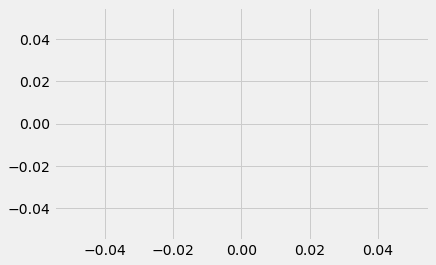

In [6]:
plt.scatter(filtered_plot_df['game_date'],filtered_plot_df['fp'],2,'g', linewidth = 1, marker = 'D', )
plt.show()

In [7]:
datelist = pd.date_range(start=season_start_date, end=season_end_date).tolist()



In [8]:
# create all days for last season
plot_df = pd.DataFrame()
plot_df['game_date'] = datelist
plot_df['game_date'] = pd.to_datetime(plot_df['game_date']).dt.strftime('%Y-%m-%d')
plot_df.set_index('game_date',inplace = True)

# fill in nan for all days
plot_df['fp'] = 0
plot_df

,fp
game_date,
2021-10-19,0
2021-10-20,0
2021-10-21,0
2021-10-22,0
2021-10-23,0
...,...
2022-04-07,0
2022-04-08,0
2022-04-09,0


In [9]:
# update with actual matches
plot_df.update(filter)
# sort by date order
plot_df.sort_values(by=['game_date'], inplace = True, ascending = True)

with pd.option_context("display.max_rows", 1000):
    display(plot_df)
len(plot_df)

,fp
game_date,
2021-10-19,0
2021-10-20,0
2021-10-21,0
2021-10-22,0
2021-10-23,0
2021-10-24,0
2021-10-25,0
2021-10-26,0
2021-10-27,0


175

In [10]:
# reset index for plotting
plot_df = plot_df.reset_index()
plot_df

,game_date,fp
0,2021-10-19,0
1,2021-10-20,0
2,2021-10-21,0
3,2021-10-22,0
4,2021-10-23,0
...,...,...
170,2022-04-07,0
171,2022-04-08,0
172,2022-04-09,0
173,2022-04-10,0


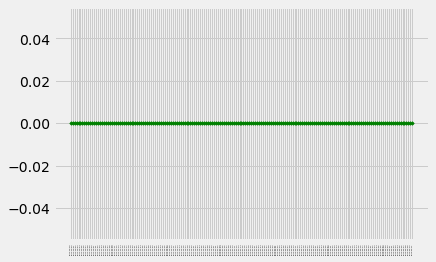

In [11]:
plt.clf()
plt.scatter(plot_df['game_date'],plot_df['fp'],5,'g', linewidth = 1, marker = 'D')
plt.xticks(rotation=90, fontsize=2)
plt.show()

In [12]:
import seaborn as sns; sns.set_theme(color_codes=True)
plot_df['fp'] = plot_df['fp'].replace(0, np.nan)
# plot_df.insert(plot_df.shape[1],
#           'row_count',
#           plot_df.index.value_counts().sort_index().cumsum())
fig = sns.regplot(data = plot_df, x = 'row_count', y = plot_df['fp'], color = '#2a9d8f')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().get_label().set_visible(False)

plt.show();
plot_df

KeyError: 'row_count'

In [ ]:


plt.show();